# Data Manipulation with pandas

## Topics covered:

1. Transforming DataFrames
2. Aggregating DataFrame
3. Slicing and Indexing DataFrames
4. Creating and Visualizing DataFrame
5. Handling missing values

This Notebook contains arguments and methods to manipulate dataframes.

- DataFrames: A two-dimensional labeled data structure in pandas, sumular to a spreadsheet or SQL table, that holds rows and columns of data.
- Series: A one-dimensional array-like pandas object that contains data for a single variables, with an index to label each value.
- Index: The labels or row identifiers of a pandas Series or DataFrame that allow for easy data alignment and selection.
- Mask: A pandas Series of Boolean values (True/False) used to filter rows of a DataFrame.
- Boolean Indexing: Selecting rows or columns in a DataFrame using logical conditions that return True or False.
- _loc[]_: A pandas method used to select rows and columns by label or conditional statements.
- _iloc[]_: A pandas method used to select rows and columns by integer position.
- Slicing: Extracting a subset of rows or columns from a DataFrame or Series using index ranges.
- Aggregation: The process of summarizing data values, such as calculating the sum, mean, or count.
- GroupBy: A pandas method to splot data into groups based on one or more variables and aggregated across multiple dimensions.
- _apply()_: A pandas function that applies a given function along an axis of a DataFrame, often slower than built-in methods.
- Imputation: The process of handling missing values by replacing them with substituted values such as mean, median, or placeholder.
- _fillna()_: A pandas methods used to replace missing values with specific values.
- _dropna()_: A pandas methods used to remove rows or columns with missing values.
- *set_index()*: A method to assign one or more columns as the index of a DataFrame.
- *reset_index()*: A method to restore the default integer index of a DataFrame, moving any existing index back into columns.
- *sort_values()*: A method to sort a DataFrame by one or more column values.
- *sort_index()*: A method to sort a DataFrame by its index values.
- *describe()*: A method to generate summary statistics (mean, median, count, etc.) for numerical columns in a DataFrame.
- _head()_: A method taht displays the first five rows of a DataFrame by default.
- _info()_: A method to print concise details about a DataFrame, including column data types and non-null values.
- *read_csv()*: A pandas function to import data from a CSV file into a DataFrame.
- *to_csv()*: A pandas function to export a DataFrame to a CSV file.

## 1. DataFrames

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)

In [196]:
df = pd.read_csv("../ZDatasets/homelessness.csv")
df.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [197]:
### Exploring a DataFrame
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB
None
(51, 6)
       Unnamed: 0    individuals  family_members     state_pop
count   51.000000      51.000000       51.000000  5.100000e+01
mean    25.000000    7225.784314     3504.882353  6.405637e+06
std     14.866069   15991.025083     7805.411811  7.327258e+06
min      0.000000     434.000000       75.000000  5.776010e+05
25%     12.500000    1446.500000      592.000000  1.777414e+06
50%     25.000000    3082.000000     1482.000000  4.461153e+06
75%     37.500000    6

In [198]:
### Components of a Dataframe
df.values
print(df.columns)
print(df.index)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')
RangeIndex(start=0, stop=51, step=1)


### 1.2. Sorting the DataFrame

#### 1.2.1 Sort a column in descending order

In [199]:
df.sort_values('state', ascending=False).head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
48,48,South Atlantic,West Virginia,1021.0,222.0,1804291
47,47,Pacific,Washington,16424.0,5880.0,7523869
46,46,South Atlantic,Virginia,3928.0,2047.0,8501286


#### 1.2.2 Sort by multiple variables

In [200]:
df.sort_values(['region','state'],ascending=[False,True]).head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
3,3,West South Central,Arkansas,2280.0,432.0,3009733
18,18,West South Central,Louisiana,2540.0,519.0,4659690
36,36,West South Central,Oklahoma,2823.0,1048.0,3940235
43,43,West South Central,Texas,19199.0,6111.0,28628666
15,15,West North Central,Iowa,1711.0,1038.0,3148618


#### 1.2.3 Subsetting

In [201]:
# Subsetting columns
df['state'].head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: state, dtype: object

In [202]:
# Subsetting multiple columns
df[['region','state']].head()

# Or
subset_col = ['region','state']
df[subset_col].head()

,region,state
0,East South Central,Alabama
1,Pacific,Alaska
2,Mountain,Arizona
3,West South Central,Arkansas
4,Pacific,California


In [203]:
# Subsetting rows
df[df['family_members'] < 500].head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
3,3,West South Central,Arkansas,2280.0,432.0,3009733
7,7,South Atlantic,Delaware,708.0,374.0,965479
24,24,East South Central,Mississippi,1024.0,328.0,2981020
26,26,Mountain,Montana,983.0,422.0,1060665
28,28,Mountain,Nevada,7058.0,486.0,3027341


In [204]:
# Subsetting based on text
df[df['state'] == "Arkansas"]

,Unnamed: 0,region,state,individuals,family_members,state_pop
3,3,West South Central,Arkansas,2280.0,432.0,3009733


In [205]:
# Subsetting based on multiple conditions
under_400_fm = df['family_members'] < 400
region_mountain = df['region'] == "Mountain"
df[under_400_fm & region_mountain]

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601


In [206]:
# Using .isin()
condition = df['state'].isin(['Wyoming'])
df[condition]

,Unnamed: 0,region,state,individuals,family_members,state_pop
50,50,Mountain,Wyoming,434.0,205.0,577601


## 2. Summary statistics

In [207]:
# Summarising numerical data
df.head()
print(f"Mean: {df['family_members'].mean()}")
print(f"Median: {df['family_members'].median()}")
print(f"Mode: {df['family_members'].mode()}")
print(f"Var: {df['family_members'].var()}")
print(f"Std: {df['family_members'].std()}")
print(f"Sum: {df['family_members'].sum()}")
print(f"Quantile 0.75: {df['family_members'].quantile(0.75)}")
print(f"Min: {df['family_members'].min()}")
print(f"Max: {df['family_members'].max()}")

Mean: 3504.8823529411766
Median: 1482.0
Mode: 0    3250.0
Name: family_members, dtype: float64
Var: 60924453.54588234
Std: 7805.411811421761
Sum: 178749.0
Quantile 0.75: 3196.0
Min: 75.0
Max: 52070.0


### 2.1 Summaries on multiple columns

In [208]:
df[['family_members','individuals']].agg(["mean", "median", "var", "std"])

,family_members,individuals
mean,3.504882e+03,7.225784e+03
median,1.482000e+03,3.082000e+03
var,6.092445e+07,2.557129e+08
std,7.805412e+03,1.599103e+04


### 2.2 Dropping duplicates

In [209]:
# Drop duplicated values
df.drop_duplicates(subset="individuals").head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


### 2.3 Inspect categorical columns

In [210]:
# Each region count in descending order
df['region'].value_counts(sort=True).head()

region
South Atlantic        9
Mountain              8
West North Central    7
New England           6
Pacific               5
Name: count, dtype: int64

In [211]:
# Proportions
df['region'].value_counts(normalize=True).head()

region
South Atlantic        0.176471
Mountain              0.156863
West North Central    0.137255
New England           0.117647
Pacific               0.098039
Name: proportion, dtype: float64

In [212]:
# New dataframe
Bicycle = pd.read_csv("../ZDatasets/Bicycle.csv")
Bicycle.head()

/var/folders/bh/_p1bkhtn09b6syd7vz5f61pw0000gn/T/ipykernel_10764/283757470.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  Bicycle = pd.read_csv("../ZDatasets/Bicycle.csv")


,Unique_ID,NB_TRAFFIC_SURVEY,NB_LOCATION_TRAFFIC_SURVEY,Sort Des,DS_LOCATION,DT_ANALYSIS_SUMMARY,NB_YEAR,NB_MONTH,NB_WEEKDAY_NONHOL_QTR,CT_VOLUME_AMPEAK,...,CT_VOLUME_24HOUR,DS_HOLIDAY,NB_SEASONALITY_PERIOD,NB_TYPE_PERIOD,Primary,weekend,Quarter,Season,Cyclying Season,day
0,1,9305,3,St Georges St Hawthorn,(BIKE PATH)ST. GEORGES ST 2WAY 50M S OF HAWTHO...,09/06/2007,2007,6,0,39,...,480,NaN,11,3,False,True,2,Winter,Non-Cycling,Sat
1,2,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,17/03/2008,2008,3,41,62,...,654,NaN,6,1,False,False,1,Autumn,Cycling,Mon
2,3,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,19/03/2008,2008,3,41,59,...,794,NaN,6,1,False,False,1,Autumn,Cycling,Wed
3,4,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,20/03/2008,2008,3,0,59,...,732,EASTHU,7,3,False,False,1,Autumn,Cycling,Thu
4,5,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,21/03/2008,2008,3,0,18,...,221,EASTER,7,3,False,False,1,Autumn,Cycling,Fri


### 2.4 Pivot tables

In [213]:
Bicycle.pivot_table(values="CT_VOLUME_PMPEAK", index = "Season", columns = "day",aggfunc = "median", margins=True)

day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,All
Season,,,,,,,,
Autumn,86.0,109.0,50.0,56.0,108.0,121.0,118.0,83.0
Spring,79.0,112.0,45.0,53.0,105.5,111.0,115.0,80.0
Summer,72.0,102.0,43.0,48.0,99.0,110.0,101.0,72.0
Winter,66.0,85.0,41.0,45.0,81.0,90.0,86.0,63.0
All,75.0,100.0,44.0,50.0,98.0,107.0,103.0,74.0


## 3. Explicit indexes

### 3.1 Setting a column as the index

In [214]:
# Set and remove an index
Bicycle.set_index("Unique_ID")
Bicycle.reset_index(drop = True) # If you want to drop it as well

,Unique_ID,NB_TRAFFIC_SURVEY,NB_LOCATION_TRAFFIC_SURVEY,Sort Des,DS_LOCATION,DT_ANALYSIS_SUMMARY,NB_YEAR,NB_MONTH,NB_WEEKDAY_NONHOL_QTR,CT_VOLUME_AMPEAK,...,CT_VOLUME_24HOUR,DS_HOLIDAY,NB_SEASONALITY_PERIOD,NB_TYPE_PERIOD,Primary,weekend,Quarter,Season,Cyclying Season,day
0,1,9305,3,St Georges St Hawthorn,(BIKE PATH)ST. GEORGES ST 2WAY 50M S OF HAWTHO...,09/06/2007,2007,6,0,39,...,480,NaN,11,3,False,True,2,Winter,Non-Cycling,Sat
1,2,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,17/03/2008,2008,3,41,62,...,654,NaN,6,1,False,False,1,Autumn,Cycling,Mon
2,3,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,19/03/2008,2008,3,41,59,...,794,NaN,6,1,False,False,1,Autumn,Cycling,Wed
3,4,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,20/03/2008,2008,3,0,59,...,732,EASTHU,7,3,False,False,1,Autumn,Cycling,Thu
4,5,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,21/03/2008,2008,3,0,18,...,221,EASTER,7,3,False,False,1,Autumn,Cycling,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56998,56999,9304,3,Scotchmans Creek Trail,(BIKE PATH)SCOTCHMANS CREEK TRAIL 52M E OF 61 ...,06/12/2012,2012,12,44,18,...,156,NaN,19,1,NaN,False,4,Summer,Cycling,Thu
56999,57000,9304,3,Scotchmans Creek Trail,(BIKE PATH)SCOTCHMANS CREEK TRAIL 52M E OF 61 ...,07/12/2012,2012,12,44,15,...,186,NaN,19,1,NaN,False,4,Summer,Cycling,Fri
57000,57001,9304,3,Scotchmans Creek Trail,(BIKE PATH)SCOTCHMANS CREEK TRAIL 52M E OF 61 ...,08/12/2012,2012,12,0,25,...,121,NaN,19,1,NaN,True,4,Summer,Cycling,Sat
57001,57002,9304,3,Scotchmans Creek Trail,(BIKE PATH)SCOTCHMANS CREEK TRAIL 52M E OF 61 ...,09/12/2012,2012,12,0,26,...,249,NaN,19,1,NaN,True,4,Summer,Cycling,Sun


## 4. Visualising data

<Axes: >

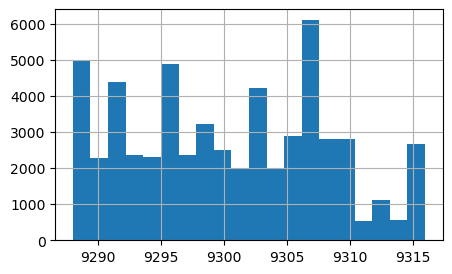

In [215]:
# Histogram
Bicycle['NB_TRAFFIC_SURVEY'].hist(bins=20)

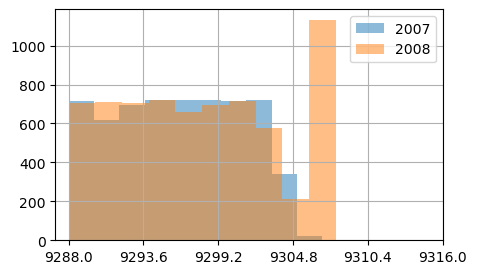

In [224]:
# Transparent Barplot
Bicycle[Bicycle['NB_YEAR'] == 2007]['NB_TRAFFIC_SURVEY'].hist(alpha = 0.5)
Bicycle[Bicycle['NB_YEAR'] == 2008]['NB_TRAFFIC_SURVEY'].hist(alpha = 0.5)
plt.legend([2007,2008])
plt.xticks(np.linspace(min(Bicycle["NB_TRAFFIC_SURVEY"]), max(Bicycle["NB_TRAFFIC_SURVEY"]), 6))
plt.show()

## 5. Missing data

### 5.1 Detecting missing values

In [217]:
# Quick overview
first_five_columns = Bicycle.isna().sum().sort_values(ascending=False).head()
first_five_columns

DS_HOLIDAY          41566
Primary               631
Unique_ID               0
CT_VOLUME_12HOUR        0
Cyclying Season         0
dtype: int64

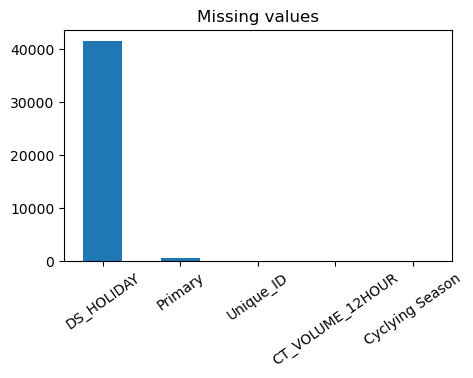

In [228]:
# Plot missing data
first_five_columns.plot(kind="bar", rot=35, title="Missing values")
plt.show()

In [232]:
# Drop missing values
Bicycle.dropna()
# Replace missing values
Bicycle.fillna(0).head()

,Unique_ID,NB_TRAFFIC_SURVEY,NB_LOCATION_TRAFFIC_SURVEY,Sort Des,DS_LOCATION,DT_ANALYSIS_SUMMARY,NB_YEAR,NB_MONTH,NB_WEEKDAY_NONHOL_QTR,CT_VOLUME_AMPEAK,...,CT_VOLUME_24HOUR,DS_HOLIDAY,NB_SEASONALITY_PERIOD,NB_TYPE_PERIOD,Primary,weekend,Quarter,Season,Cyclying Season,day
0,1,9305,3,St Georges St Hawthorn,(BIKE PATH)ST. GEORGES ST 2WAY 50M S OF HAWTHO...,09/06/2007,2007,6,0,39,...,480,0,11,3,False,True,2,Winter,Non-Cycling,Sat
1,2,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,17/03/2008,2008,3,41,62,...,654,0,6,1,False,False,1,Autumn,Cycling,Mon
2,3,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,19/03/2008,2008,3,41,59,...,794,0,6,1,False,False,1,Autumn,Cycling,Wed
3,4,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,20/03/2008,2008,3,0,59,...,732,EASTHU,7,3,False,False,1,Autumn,Cycling,Thu
4,5,9306,1,Flemington Rd NW Bound Lane,(BIKE LANE)FLEMINGTON RD NW BD 10M SE OF DRYBU...,21/03/2008,2008,3,0,18,...,221,EASTER,7,3,False,False,1,Autumn,Cycling,Fri
